# 2023-08-25 4 - Results Multimodel single param 5e
Ran a sweep with `Autoformer, Reformer and DLinear` constrained and ERM to quickly see, with our believed "good" parameters, what's the effect on the error window

## Fetching runs

In [69]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
api = wandb.Api()
project = "Autoformer"
workspace = "alelab"
experiment_run_name_suffix="-newloss"

runs = api.runs(f"{workspace}/{project}")
all_runs = []
for run in tqdm(runs):
    if run.State=="finished" or True:
        for split in ["train", "test"]:
            #for metric in ["mse",]:
            for metric in ["loss",]: #had to change in this plot because I messed up. The 'loss' name is incorrect (it's not the lagrange-added loss.)
                pred_len = run.config["pred_len"]
                metrics = np.zeros(pred_len)
                if run.sweep.id in ["tkol4t1r","c7xaz5e8"]:
                    for i in range(pred_len):
                        run_dict = {**run.config}
                        #run_dict["constraint_level"] = constraint_level
                        #run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                        run_dict[f"{metric}"] = run.summary.get(f"{metric}/{split}/{i}",run.summary.get(f"mse/{split}/{i}",np.nan)) #god forgive me for this line
                        run_dict["step"]=i
                        run_dict["split"] = split
                        run_dict["run_id"] = run.id
                        # Get either Constrained/ or ERM/ from the run name, then append model name.
                        #print("run.name", run.name)
                        #debug if ERM run
                        run_dict["Algorithm"] = f"{run.name.split('/')[0]} {run.config['model']}"
                        run_dict["sweep_id"] = run.sweep.id
                        #print("Algorithm", run_dict["Algorithm"])
                        all_runs.append(run_dict)

df = pd.DataFrame(all_runs)

100%|██████████| 240/240 [00:14<00:00, 17.06it/s]


In [70]:
df[['run_id',"sweep_id",'Algorithm','model','constraint_level','pred_len']].drop_duplicates().sort_values(['model',"pred_len","constraint_level"])

,run_id,sweep_id,Algorithm,model,constraint_level,pred_len
5184,tm9558j0,c7xaz5e8,ERM-5e Autoformer,Autoformer,-1.0,96
10560,7l3vasqa,tkol4t1r,Constrained-5e Autoformer,Autoformer,0.5,96
4800,419htb1s,c7xaz5e8,ERM-5e Autoformer,Autoformer,-1.0,192
10176,nnv4rows,tkol4t1r,Constrained-5e Autoformer,Autoformer,0.5,192
4128,ulymlsbg,c7xaz5e8,ERM-5e Autoformer,Autoformer,-1.0,336
9504,1b2pmtt9,tkol4t1r,Constrained-5e Autoformer,Autoformer,0.5,336
2688,hulz8sfh,c7xaz5e8,ERM-5e Autoformer,Autoformer,-1.0,720
8064,s1pux26q,tkol4t1r,Constrained-5e Autoformer,Autoformer,0.5,720
2496,3n6rphzo,c7xaz5e8,ERM-5e DLinear,DLinear,-1.0,96
7872,92cz4zqf,tkol4t1r,Constrained-5e DLinear,DLinear,0.5,96


In [58]:
list(df.groupby(["pred_len",'model'])['model'])

[((96, 'Autoformer'),
  5184     Autoformer
  5185     Autoformer
  5186     Autoformer
  5187     Autoformer
  5188     Autoformer
              ...    
  10747    Autoformer
  10748    Autoformer
  10749    Autoformer
  10750    Autoformer
  10751    Autoformer
  Name: model, Length: 384, dtype: object),
 ((96, 'DLinear'),
  2496    DLinear
  2497    DLinear
  2498    DLinear
  2499    DLinear
  2500    DLinear
           ...   
  8059    DLinear
  8060    DLinear
  8061    DLinear
  8062    DLinear
  8063    DLinear
  Name: model, Length: 384, dtype: object),
 ((192, 'Autoformer'),
  4800     Autoformer
  4801     Autoformer
  4802     Autoformer
  4803     Autoformer
  4804     Autoformer
              ...    
  10555    Autoformer
  10556    Autoformer
  10557    Autoformer
  10558    Autoformer
  10559    Autoformer
  Name: model, Length: 768, dtype: object),
 ((192, 'DLinear'),
  2112    DLinear
  2113    DLinear
  2114    DLinear
  2115    DLinear
  2116    DLinear
           .

In [68]:
df.groupby(["pred_len","model",'constraint_level']).size().reset_index()

,pred_len,model,constraint_level,0
0,96,Autoformer,-1.0,192
1,96,Autoformer,0.5,192
2,96,DLinear,-1.0,192
3,96,DLinear,0.5,192
4,192,Autoformer,-1.0,384
5,192,Autoformer,0.5,384
6,192,DLinear,-1.0,384
7,192,DLinear,0.5,384
8,336,Autoformer,-1.0,672
9,336,Autoformer,0.5,672


## Plotting results

In [60]:
#import makdown ipynb.
from IPython.display import Markdown, display

pred_len 96
model Autoformer
constraint_level_to_plot 0.5
pred_len_to_plot 720


### Autoformer pred_len: 96 constraint_level: 0.5

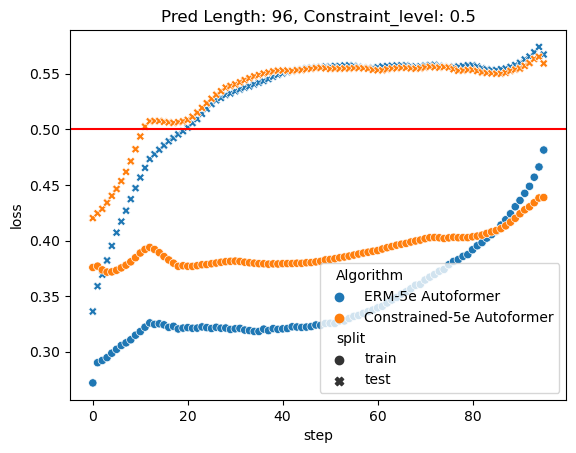

pred_len 96
model DLinear
constraint_level_to_plot 0.5
pred_len_to_plot 720


### DLinear pred_len: 96 constraint_level: 0.5

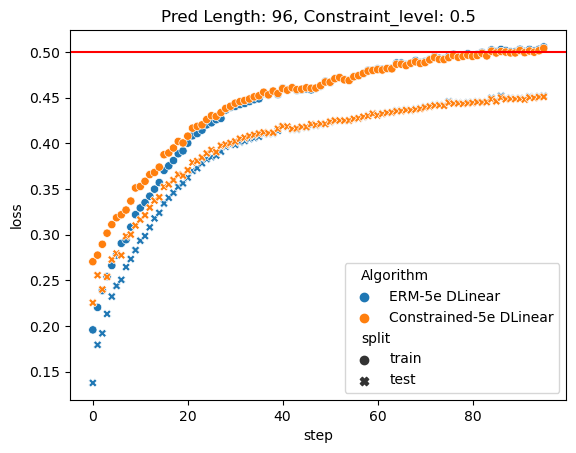

pred_len 192
model Autoformer
constraint_level_to_plot 0.5
pred_len_to_plot 720


### Autoformer pred_len: 192 constraint_level: 0.5

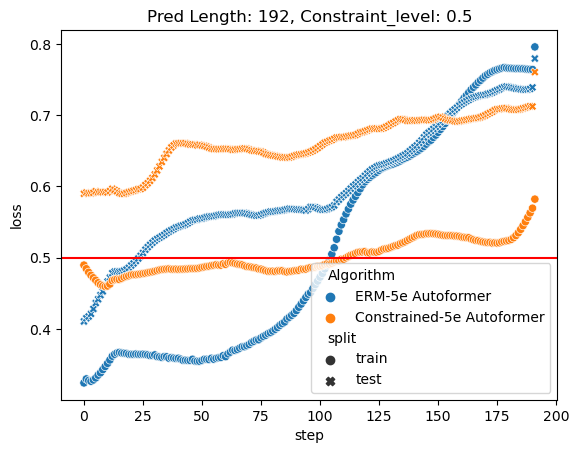

pred_len 192
model DLinear
constraint_level_to_plot 0.5
pred_len_to_plot 720


### DLinear pred_len: 192 constraint_level: 0.5

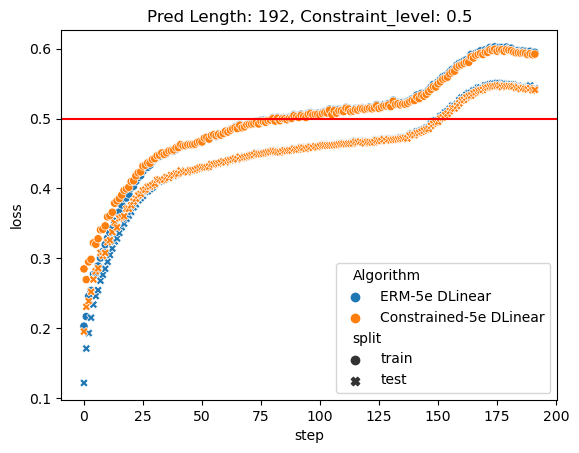

pred_len 336
model Autoformer
constraint_level_to_plot 0.5
pred_len_to_plot 720


### Autoformer pred_len: 336 constraint_level: 0.5

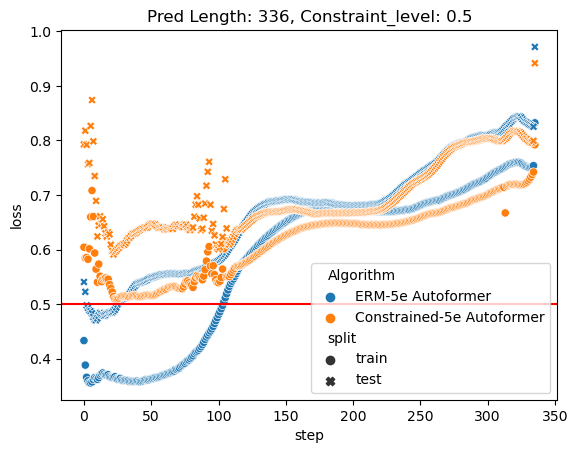

pred_len 336
model DLinear
constraint_level_to_plot 0.5
pred_len_to_plot 720


### DLinear pred_len: 336 constraint_level: 0.5

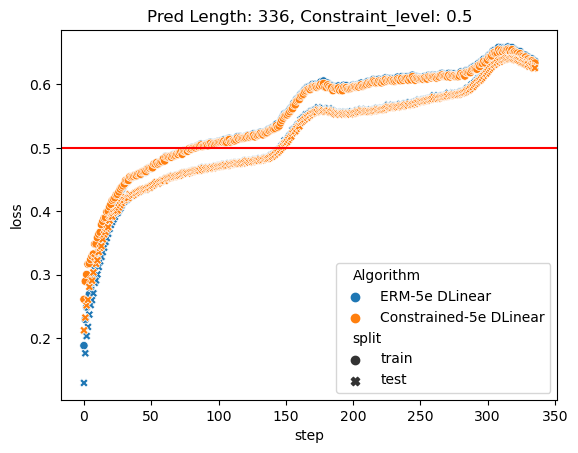

pred_len 720
model Autoformer
constraint_level_to_plot 0.5
pred_len_to_plot 720


### Autoformer pred_len: 720 constraint_level: 0.5

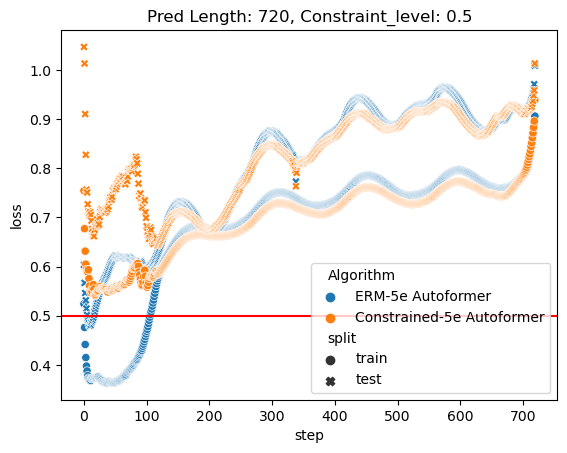

pred_len 720
model DLinear
constraint_level_to_plot 0.5
pred_len_to_plot 720


### DLinear pred_len: 720 constraint_level: 0.5

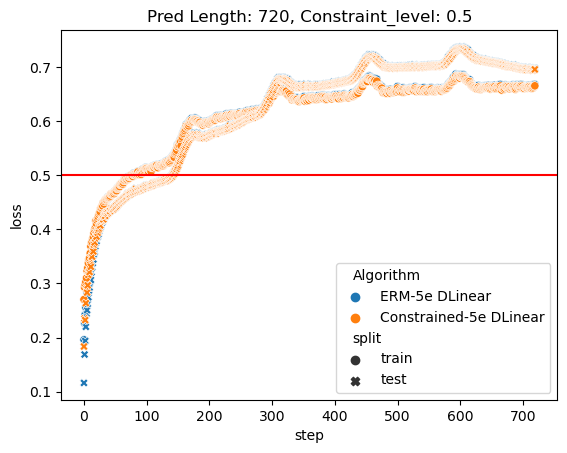

In [71]:
for (pred_len,model), series in df.groupby(["pred_len","model"]):
    for constraint_level_to_plot in [0.5]:
        print("pred_len", pred_len)
        print("model", model)
        print("constraint_level_to_plot", constraint_level_to_plot)
        print("pred_len_to_plot", pred_len_to_plot)

        display(Markdown(f"### {model} pred_len: {pred_len} constraint_level: {constraint_level_to_plot}"))
        plot_series = series[series["constraint_level"].isin([constraint_level_to_plot,-1.0])]
        #sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        sns.scatterplot(x="step", y="loss", hue="Algorithm",style="split", data=plot_series)
        plt.axhline(y=constraint_level, color='r', linestyle='-')
        plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        plt.show()

In [ ]:
for pred_len, series in df.groupby("pred_len"):
    for constraint_level in [0.45, 0.5, 0.55]:
        plot_series = series[series["constraint_level"].isin([constraint_level, 0, 0.4])]
        sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        plt.show()